# K-Nearest Neighbors and Feature Scaling

Goals:

- Learn about the K-Nearest Neighbors machine learning algorithm. How it works and how to use it.
- Use the KNN model on the 2016 Democratic dataset.
- Feature engineering continued: scaling data with standard and minmax scalers.
- How and when to use scaling for you data.
- Class work: compare and contrast KNN and decision tree models on classification supervised learning datasets

## K-Nearest Neighbors

- Known as the "easy" machine learning model
- Classifies an event based on its closest relatives in the data the model has been trained on. Hence the term "Nearest Neighbors". K = number of neighbors.
- Known as a voting classifier because n neighbors vote for the classification.
- Uses Euclidean Distance to calculate similarity.
- Pros: Fast, intuitive, easy to interpret, ability to make probabilities.
- Cons: Poor at handling many features, especially "noisy" features because it treats every feature equally. Not good with small sample sizes. Usually requires scaling.

![ED](https://4.bp.blogspot.com/-UDuXTjw5pbw/WkZ_Yt7qrWI/AAAAAAAAARw/BWh39dRCPzwP1jowVg9lSOH8yfHvrv1lQCLcBGAs/s1600/euclidian.PNG)

Source: Sumit Jha

In [3]:
#Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight");

In [4]:
#Fake data time
data = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                            class_sep=.35,
                           random_state=5)

In [14]:
data[0]

array([[-1.64208426e+00,  1.33909368e+00],
       [-7.84022851e-01,  1.00602461e+00],
       [-4.58630519e-01,  4.11381175e-01],
       [-5.71093230e-01,  5.55352704e-01],
       [-7.84698646e-01, -2.82529900e-01],
       [-3.95547667e-01, -6.58290421e-01],
       [ 5.33008619e-01, -1.22384013e-01],
       [-1.22196125e+00,  1.33124762e+00],
       [-1.27122681e+00,  1.77389896e+00],
       [-1.11883838e-01, -9.56891610e-01],
       [ 1.29540037e+00, -1.79779965e-01],
       [-9.88677972e-01,  9.06186213e-01],
       [-1.94784129e+00,  1.49455341e+00],
       [-4.25436206e-01,  1.12583269e-01],
       [-2.04561794e+00,  1.48736352e+00],
       [ 9.36101853e-01,  4.05150046e-01],
       [ 1.33423013e+00, -5.96080277e-01],
       [-1.28381235e+00,  9.23115513e-01],
       [ 4.42584545e-01,  7.92360332e-01],
       [-4.32201004e-01,  2.93243248e-01],
       [ 4.09036084e-02, -4.43595996e-01],
       [ 3.54283081e-01, -1.96840898e+00],
       [-1.35628777e+00,  1.53617903e+00],
       [-1.

In [15]:
data[1]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1])

In [5]:
#Slice the features and target variable from data

X = data[0]
y = data[1]

(-3, 3)

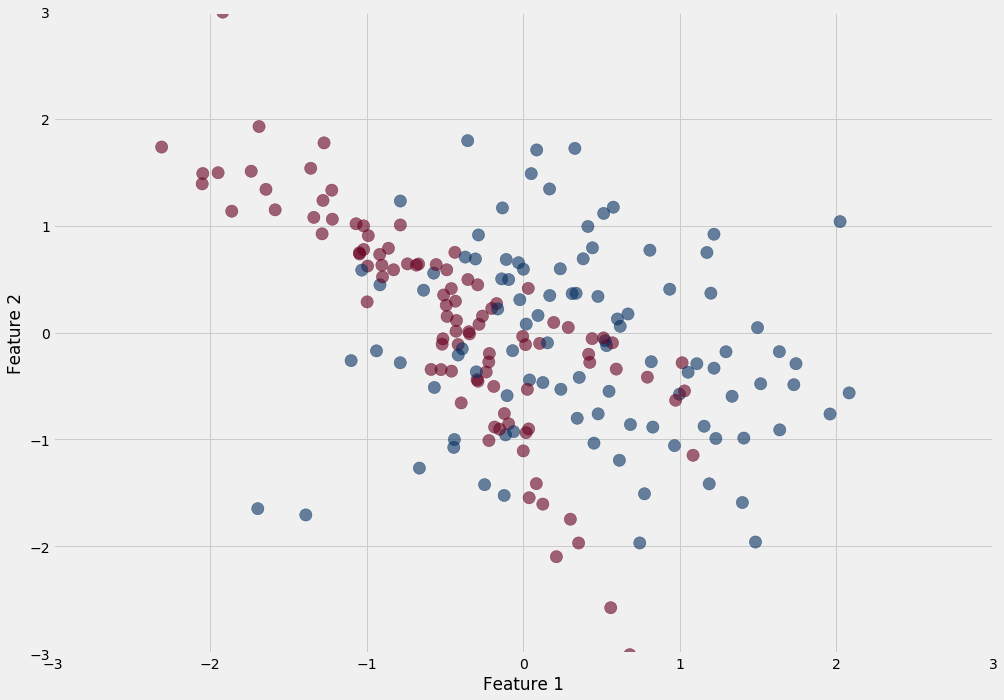

In [7]:
#Plot the data with its color-encodings

plt.figure(figsize=(15,11))
plt.scatter(X[:,0],X[:,1], c=y, cmap = "RdBu", s = 150, alpha =0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-3,3)
plt.ylim(-3,3)

Time to use K-Nearest Neighbors (KNN) to model this data.

Train a KNN model using 3 neighbors

In [20]:
#intialize model and set n_neighbors equal to 3
knn3 = KNeighborsClassifier(n_neighbors=3)

#Fit the model on the "fake data"
knn3.fit(X,y)

#Find the accuracy score of the model on the data
score3 = knn3.score(X,y)

print ("The model accurately labelled {:.2f} percent of the data".format(score3*100))

The model accurately labelled 89.50 percent of the data


Now with 5 neighbors

In [21]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)

#Fit the model on the "fake data"
knn5.fit(X,y)

#Find the accuracy score of the model on the data
score5 = knn5.score(X,y)

print ("The model accurately labelled {:.2f} percent of the data".format(score5 * 100))

The model accurately labelled 85.00 percent of the data


Apply model on a new point

In [22]:
#New data point
new_data = np.asarray([0.18,0.15]).reshape(1,-1)

#Make predictions on new_data using both models
pred3 = knn3.predict(new_data)
pred5 = knn5.predict(new_data)

#Call those predictions
print ("The knn3 model thinks new_data belongs to class {}".format(pred3[0]))
print ("The knn5 model thinks new_data belongs to class {}".format(pred5[0]))

The knn3 model thinks new_data belongs to class 0
The knn5 model thinks new_data belongs to class 1


Look at class probabilities

In [24]:
#Use predict_proba to find class probabilities on new_data
knn3.predict_proba(new_data)

array([[0.66666667, 0.33333333]])

In [25]:
#For 5 neighbors
knn5.predict_proba(new_data)

array([[0.4, 0.6]])

These probabilites are the vote percentages.

Visualize new point in relation to data

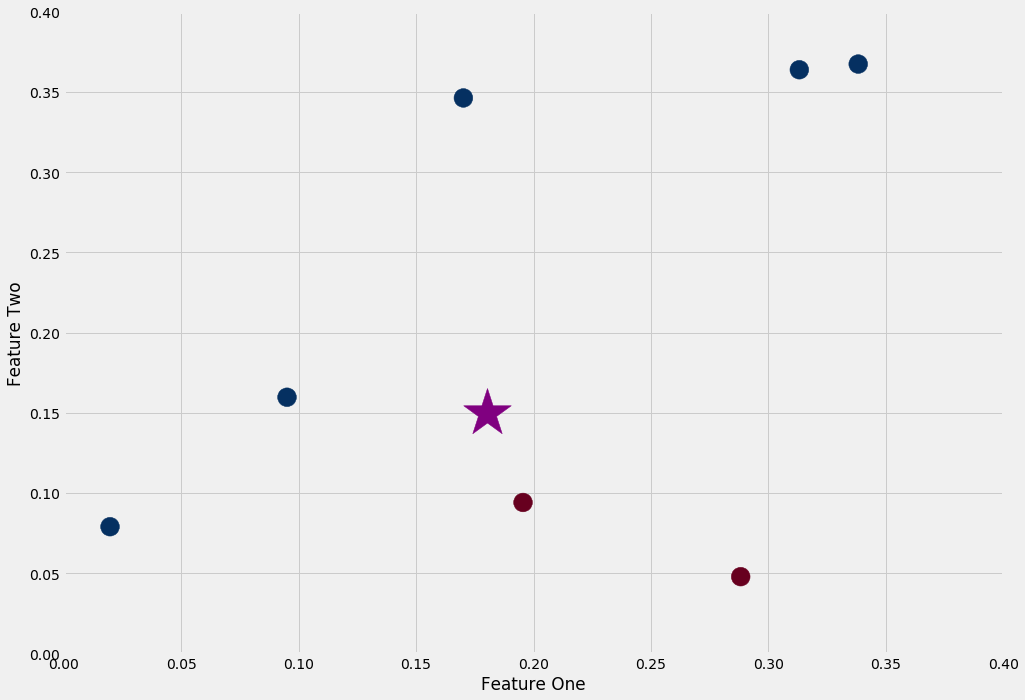

In [26]:
plt.figure(figsize=(15,11))
plt.xlim(0,0.4)
plt.ylim(0,.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap = "RdBu", s=350)
#Plot of new_data point
plt.scatter([0.18], [0.15], c="purple", cmap = "RdBu",marker="*", s= 2500)
plt.xlabel("Feature One")
plt.ylabel("Feature Two");

Classify the purple star using the KNN method.

Visualizing KNN

In [34]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y, n_neighbors):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, cmap = "RdBu",s=40, alpha=0.4)
    plt.title("Plot of {} neighbors".format(n_neighbors))
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

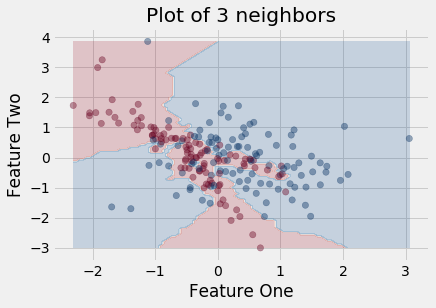

In [35]:
#Visualize the knn3 model

plot_decision_boundary(knn3,X,y,3)

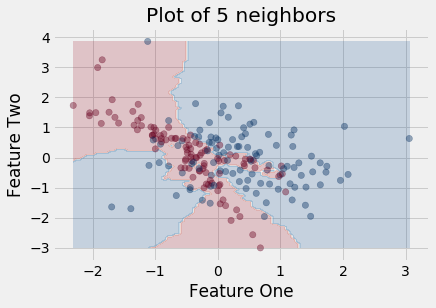

In [36]:
#Visualize the knn5 model
plot_decision_boundary(knn5, X, y, 5)

13 neighbors

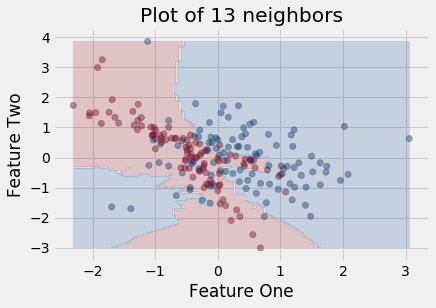

In [37]:
#Plot 13 neighbors
#Fit model first before you plot

knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X, y)
plot_decision_boundary(knn13, X, y, 13)

25 neighbors! 

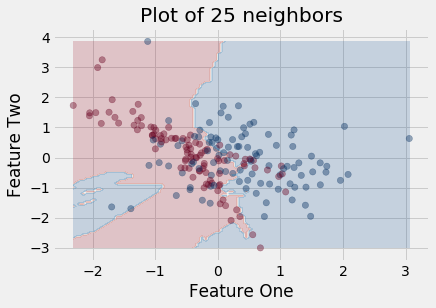

In [40]:
#Plot 25 neighbors
#Fit model first before you plot

knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X, y)
plot_decision_boundary(knn25, X, y, 25)

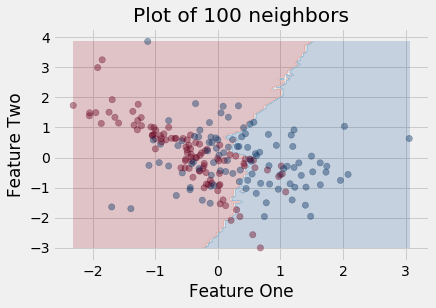

In [41]:
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X, y)
plot_decision_boundary(knn100, X, y, 100)

## 2016 Democratic Primary Data

### Data cleaning

Dataset: County-level results of 2016 Democratic Primary and county demographic information.

Kaggle page: https://www.kaggle.com/benhamner/2016-us-election

In [48]:
#Load in data files
primary = pd.read_csv("../../data/primary_data//primary_results.csv")
county = pd.read_csv("../../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../../data/primary_data/county_facts_dictionary.csv")

In [49]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [50]:
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [51]:
county_dict.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


Before we can clean model, we have to clean first, but I've already done the work on that already.

In [52]:
#Data cleaning 

subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

county = county.iloc[:,subset_col_index].copy()

subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

col_dict = dict(zip(county.columns, subset_cols))
#Use dictionary to rename the columns
county.rename(columns=col_dict, inplace=True)
primary.dropna(inplace=True)
bern = primary[primary.candidate== "Bernie Sanders"]
hill = primary[primary.candidate== "Hillary Clinton"]
bern = bern[["fips", "candidate", "votes"]]
dem = pd.merge(hill, bern, on="fips")
dem.rename(columns={"votes_x":"clinton_votes", "votes_y":"sanders_votes"}, inplace=True)
dem["winner"] = dem.clinton_votes - dem.sanders_votes
def vote_winner(x):
    if x >0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"
    
dem["winner"] = dem.winner.apply(vote_winner)

dem = dem[dem.winner!= "TIE"]
dem = dem[["fips", "winner"]]
df = pd.merge(county, dem, on="fips")
df.set_index("fips", inplace=True)
df.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


In [55]:
col_dict

{'AGE775214': 'senior_pop_per',
 'EDU685213': 'college_degree_pop_',
 'INC110213': 'median_income',
 'LFE305213': 'commute_time',
 'POP060210': 'pop_density',
 'POP645213': 'foreign_pop_per',
 'PST045214': 'population',
 'PST120214': 'pop_change',
 'PVY020213': 'poverty_rate',
 'RHI225214': 'black_pop_per',
 'RHI825214': 'white_pop_per',
 'SEX255214': 'female_pop_per',
 'fips': 'fips'}

Time for some modeling. We're going to use KNN to classify counties as Hillary or Bernie.

In [56]:
#Check null accuracy
df.winner.value_counts(normalize=True)

H    0.592272
B    0.407728
Name: winner, dtype: float64

In [58]:
#Assign X and y

X = df.drop("winner", axis=1)
y = df.winner

In [60]:
#Fit model using a single neighbor

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X, y)
knn1.score(X, y)


1.0

<b>NOTE:<b>
    With n=1, The nearest neigbor is itself when evaluating. Hence it will always be 1

Perfect model!!!!

Oh wait

In [62]:
#Fit model using three neighbors

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X, y)
knn3.score(X,y)

0.7681473456121344

What happened here?

What about 7 neighbors?

In [64]:
#Fit model using seven neighbors

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X, y)
knn7.score(X,y) 

0.7038642109064644

Let's try something much higher

In [65]:
#Fit model using 29 neighbors
knn29 = KNeighborsClassifier(n_neighbors=29)
knn29.fit(X, y)
knn29.score(X,y)

0.6522210184182016

Try it out on a testing set

In [66]:
#Make a train/test split. Set test_size = .25
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=42)

Fit model with 5 neighbors on training data and test model on testing data

In [67]:
#Fit model on training data

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

0.5800865800865801

In [69]:
#Call confusion_matrix 

preds = knn5.predict(X_test)
confusion_matrix(y_test, preds)

array([[126, 157],
       [134, 276]])

Good or bad?
<br><br>
Let's increase number of neighbors

In [71]:
#Fit model on training data
knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
knn17.score(X_test, y_test)

0.5930735930735931

In [72]:
knn27 = KNeighborsClassifier(n_neighbors=27)
knn27.fit(X_train, y_train)
knn27.score(X_test, y_test)

0.5887445887445888

Big difference?

**Cross validation.**
<br><br>
Class exercise time: Make a validation curve plot of neighbors vs the 5-fold cross validated accuracy score of a KNN model. Use odd numbers from 3 to 39.

Text(0,0.5,'CV Accuracy curve')

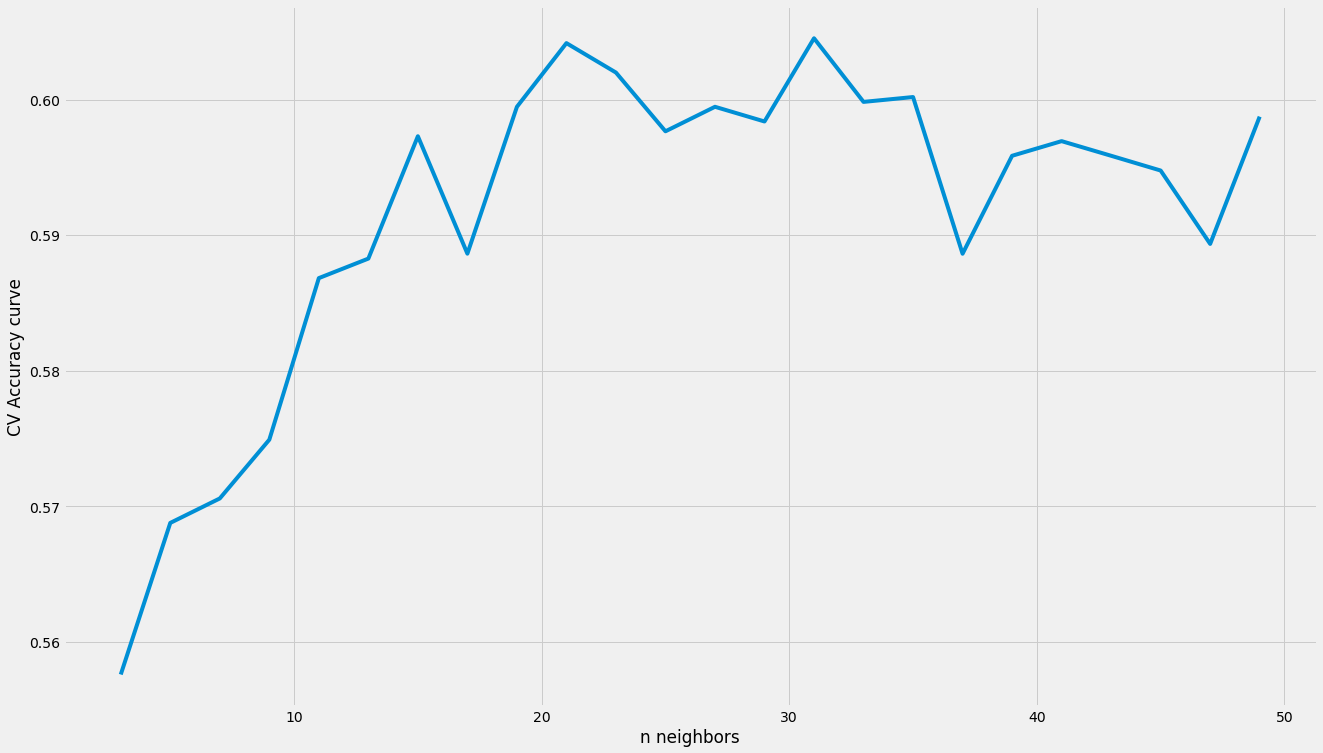

In [127]:
#Answer

neighbors = range(3, 51, 2)

cv_scores = []

for neighbor in neighbors:
    cv_score = cross_val_score(KNeighborsClassifier(n_neighbors=neighbor),X, y, cv=5, scoring="accuracy").mean()
    cv_scores.append(cv_score)
    
plt.figure(figsize=(20,12))
plt.plot(neighbors,cv_scores, linewidth=4)
plt.xlabel("n neighbors")
plt.ylabel("CV Accuracy curve")

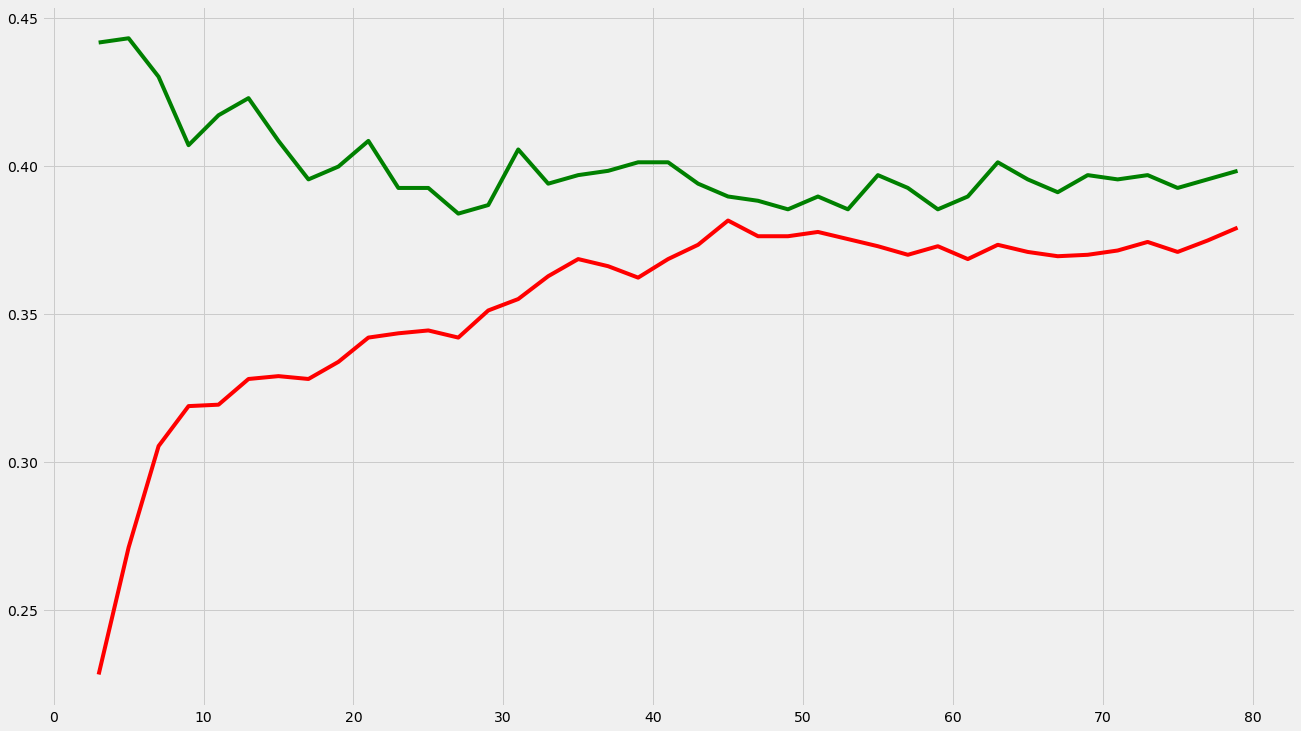

In [92]:
#Test error vs Train errors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=38)

neighbors = range(3, 81, 2)

test_errors = []
train_errors = []

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_error = 1 - knn.score(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(20,12))
plt.plot(neighbors, train_errors, c="r", linewidth=4, label = "Train")
plt.plot(neighbors, test_errors, c="g", linewidth=4, label = "Test")


Which neighbor value/s produces the best accuracy score?
<br><br>
How does that compare to the null accuracy?

What is the issue here? We can't seem to build a model that can significantly beat our null accuracy.
<br><br>
Think about the features and how they differ from each other.


## Scaling Data
<br><br>
[Feature scaling:](https://en.wikipedia.org/wiki/Feature_scaling) A method used to standardize the range of independent variables or features of data

Let's take a look at this sample data set.

In [93]:
#Initialize data
sample = {"income":[30000, 55000, 36000], 
          "white_pop":[50, 85, 95], 
          "college_deg":[15, 40, 50], 
          "class":["A","B", "X"]}

sample= pd.DataFrame(sample)
sample

,class,college_deg,income,white_pop
0,A,15,30000,50
1,B,40,55000,85
2,X,50,36000,95


Which class is row 2 closer to? A or B?
Let's use euclidean distance to figure that out.

In [94]:
#Assign rows in data to variables
class_A = sample.iloc[0, 1:].values
class_B = sample.iloc[1, 1:].values
class_X = sample.iloc[2, 1:].values

In [97]:
#Euclidean distance between class A and class x

np.sqrt(((class_A-class_X)**2).sum())

6000.270827221051

In [98]:
#Euclidean distance between class B and class x
np.sqrt(((class_B-class_X)**2).sum())

19000.005263157167

Which class should class_X be assigned to based on this calculation? Do you agree or disagree

This example demonstrates the necessity of feature scaling.

From [Sebastian Raschka](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

<b>Standardization</b>: "The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0μ=0  and σ=1

Where μ is the mean (average) and σσ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:"
![e](http://www.statisticshowto.com/wp-content/uploads/2016/11/alternate-z-score.png)
<br><br>
<b>MinMax Scaling</b>: "An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:"
![d](https://qph.ec.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e)

Let's scale the features using StandardScaler and MinMaxScaler

In [99]:
#Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
#Intialize scalers

ss = StandardScaler()
mm = MinMaxScaler()

#Fit data on scalers

ss.fit(X)
mm.fit(X)


MinMaxScaler(copy=True, feature_range=(0, 1))

We don't have any data yet, we need then transform the data using the fit scalers

In [101]:
#Use ss and mm to transform X

Xss = ss.transform(X)
Xmm = mm.transform(X)


We can fit and transform at the same time

In [ ]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit and transform data using scalers
X_ss = ss.fit_transform(X)
X_mm = mm.fit_transform(X)

In [106]:
#Make data frames from scaled data. Use columns from X

# X_ss = pd.DataFrame(Xss, columns=X.columns, index=df.index)
# X_mm = pd.DataFrame(Xmm, columns=X.columns, index=df.index)

X_ss = pd.DataFrame(X_ss, columns=X.columns, index=df.index)
X_mm = pd.DataFrame(X_mm, columns=X.columns, index=df.index)

In [107]:
#Take a look at both data frames
X_ss.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
fips,,,,,,,,,,,,
1001,-0.148823,0.278481,-0.851504,0.622683,0.565499,-0.027820,-0.527947,0.178889,0.518359,0.721738,-0.795982,-0.097887
1003,0.293712,2.412106,0.273221,0.535213,-0.039386,0.342080,-0.170632,0.950101,0.461523,0.429408,-0.518507,-0.085256
1005,-0.235999,-0.646947,-0.231757,-1.476598,2.486508,-1.477430,-0.295692,-0.671712,0.215234,-1.032661,1.454647,-0.131570
1007,-0.249396,-0.569828,-0.621968,-1.782744,0.791500,-0.082805,-0.599411,-0.819149,0.783594,-0.733997,0.128934,-0.128357
1009,-0.141716,0.072830,-0.116989,0.229068,-0.557859,0.582016,-0.045571,-0.819149,1.977151,-0.083794,-0.225617,-0.099494


In [108]:
X_mm.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
fips,,,,,,,,,,,,
1001,0.005467,0.454545,0.198770,0.797753,0.219741,0.759162,0.031189,0.248596,0.500000,0.329539,0.214149,0.001320
1003,0.019772,0.658477,0.299180,0.790262,0.112808,0.836649,0.070175,0.344101,0.491667,0.295691,0.248566,0.001648
1005,0.002649,0.366093,0.254098,0.617978,0.559342,0.455497,0.056530,0.143258,0.455556,0.126403,0.493308,0.000445
1007,0.002216,0.373464,0.219262,0.591760,0.259694,0.747644,0.023392,0.125000,0.538889,0.160985,0.328872,0.000528
1009,0.005697,0.434889,0.264344,0.764045,0.021152,0.886911,0.083821,0.125000,0.713889,0.236269,0.284895,0.001278


In [109]:
#What happens when you call .describe() on X_ss
X_ss.describe()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
count,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03
mean,-4.270089e-18,-1.368834e-16,5.410784e-16,1.488196e-15,-5.244390e-17,-1.033843e-16,-4.972247e-17,3.570436e-17,7.334128e-16,1.133277e-16,2.190776e-16,7.467643e-18
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-3.179549e-01,-4.477190e+00,-3.078000e+00,-8.692878e+00,-6.775061e-01,-3.651845e+00,-8.138002e-01,-1.828529e+00,-2.891802e+00,-2.124356e+00,-2.522492e+00,-1.486885e-01
25%,-2.799873e-01,-6.212409e-01,-6.219680e-01,-1.645473e-01,-6.176823e-01,-5.976668e-01,-5.994107e-01,-6.943944e-01,-6.941425e-01,-6.461542e-01,-6.880754e-01,-1.372763e-01
50%,-2.349804e-01,-1.585270e-01,-9.403586e-02,1.853329e-01,-4.847405e-01,3.370815e-01,-3.671553e-01,-2.634232e-01,-6.894627e-02,-1.466350e-01,-1.022952e-01,-1.218199e-01
75%,-9.862318e-02,4.841312e-01,5.257105e-01,4.914781e-01,1.733212e-01,8.269496e-01,1.866843e-01,3.830336e-01,6.320314e-01,4.408955e-01,5.605612e-01,-8.054745e-02
max,3.061820e+01,5.985285e+00,8.123342e+00,2.984375e+00,4.979166e+00,1.121870e+00,8.351353e+00,6.246510e+00,3.928521e+00,6.512241e+00,5.539692e+00,3.833573e+01


In [110]:
X_mm.describe()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,0.010278,0.427928,0.274788,0.744428,0.119771,0.764990,0.088793,0.226442,0.423998,0.245971,0.312879,0.003864
std,0.032330,0.095597,0.089291,0.085652,0.176814,0.209518,0.109129,0.123861,0.146647,0.115807,0.124058,0.025989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001227,0.368550,0.219262,0.730337,0.010576,0.639791,0.023392,0.140449,0.322222,0.171156,0.227533,0.000297
50%,0.002682,0.412776,0.266393,0.760300,0.034078,0.835602,0.048733,0.193820,0.413889,0.228993,0.300191,0.000698
75%,0.007090,0.474201,0.321721,0.786517,0.150411,0.938220,0.109162,0.273876,0.516667,0.297021,0.382409,0.001771
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


What do you notice about the means and standard deviations?

What happens when we receive new data? How do we scale it using the scale of our previous data?

In [111]:
#Select San Francisco and Santa Cruz counties
ba = county[(county.fips==6075) | (county.fips==6087)].drop("fips", axis=1)
ba

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
229,852469,5.9,14.4,49.1,5.8,41.2,35.6,52.4,30.5,75604,13.5,17179.1
235,271804,3.6,13.5,50.4,1.4,58.2,18.3,37.0,25.4,66519,14.6,589.4


In [113]:
#Use the ss scaler object used to fit and transform X to transform ba.
ba_ss = ss.transform(ba)
ba_ss

array([[ 2.28859267,  1.4095589 , -0.71378225, -0.38322249, -0.29197498,
        -1.74735729,  5.54642291,  3.75141389,  1.33300903,  2.57335405,
        -0.58016851,  9.36834919],
       [ 0.51294611,  0.8183134 , -0.92036438,  0.18533292, -0.58444687,
        -0.89758608,  2.45564033,  2.00484635,  0.3667966 ,  1.80600006,
        -0.41060058,  0.17777926]])

In [115]:
ba_ss[0]

array([ 2.28859267,  1.4095589 , -0.71378225, -0.38322249, -0.29197498,
       -1.74735729,  5.54642291,  3.75141389,  1.33300903,  2.57335405,
       -0.58016851,  9.36834919])

In [116]:
ba_ss[1]

array([ 0.51294611,  0.8183134 , -0.92036438,  0.18533292, -0.58444687,
       -0.89758608,  2.45564033,  2.00484635,  0.3667966 ,  1.80600006,
       -0.41060058,  0.17777926])

In [117]:
#Use the mm scaler object used to fit and transform X to transform ba.
ba_mm = mm.transform(ba)
ba_mm

array([[0.08425572, 0.56265356, 0.21106557, 0.71161049, 0.06815511,
        0.39895288, 0.69395712, 0.69101124, 0.61944444, 0.54393068,
        0.24091778, 0.24729585],
       [0.02685858, 0.50614251, 0.19262295, 0.76029963, 0.01645123,
        0.57696335, 0.35672515, 0.4747191 , 0.47777778, 0.45508156,
        0.26195029, 0.00848312]])

In [118]:
ba_mm[0]

array([0.08425572, 0.56265356, 0.21106557, 0.71161049, 0.06815511,
       0.39895288, 0.69395712, 0.69101124, 0.61944444, 0.54393068,
       0.24091778, 0.24729585])

In [119]:
ba_mm[1]

array([0.02685858, 0.50614251, 0.19262295, 0.76029963, 0.01645123,
       0.57696335, 0.35672515, 0.4747191 , 0.47777778, 0.45508156,
       0.26195029, 0.00848312])

Class exercise time: 

Work with partner to investigate whether or not our model significantly improves when using scaled data. Which scaler improves our modeling more? Use cross validation and charts and examine as many neighbors as possible.


Text(0.5,1,'MinMax scale Scores')

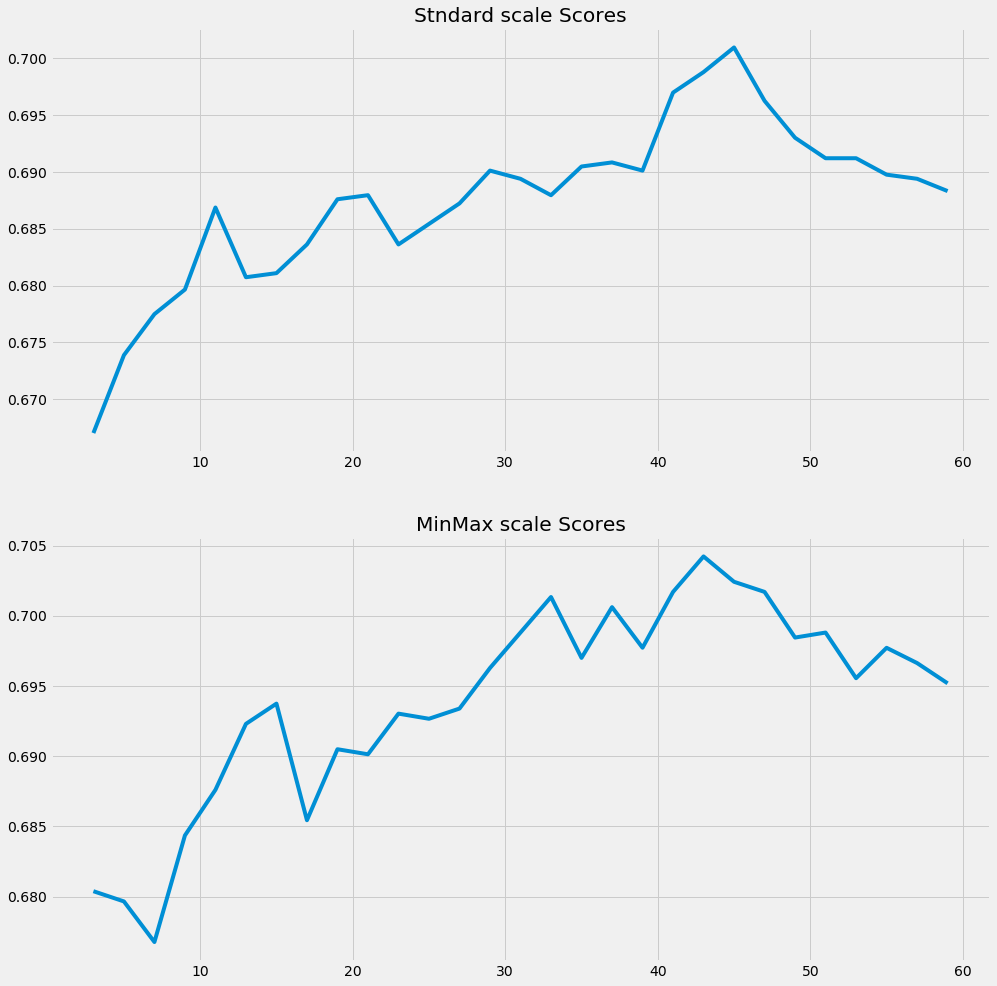

In [124]:
#Answer

neighbors = range(3, 61, 2)

cv_scores_ss = []
cv_scores_mm = []

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    cv_score = cross_val_score(model, X_ss, y, cv=5, scoring="accuracy").mean()
    cv_scores_ss.append(cv_score)
    
for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    cv_score = cross_val_score(model, X_mm, y, cv=5, scoring="accuracy").mean()
    cv_scores_mm.append(cv_score)
    
plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
plt.plot(neighbors,cv_scores_ss, linewidth=4)
plt.title("Stndard scale Scores")

plt.subplot(2,1,2)
plt.plot(neighbors,cv_scores_mm, linewidth=4)
plt.title("MinMax scale Scores")

In [135]:
# plt.figure(figsize=(15,8))
# # plt.subplot(2,1,1)
# plt.plot(neighbors,cv_scores_ss,linewidth=4)
# plt.plot(neighbors,cv_scores_mm, linewidth=4)
# # plt.title("Stndard scale Scores")

# # plt.subplot(2,1,2)
# # plt.plot(neighbors,cv_scores_mm, linewidth=4)
# # plt.title("MinMax scale Scores")

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)

In [151]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [152]:
knn43 = KNeighborsClassifier(n_neighbors=43)
knn43.fit(X_train_s, y_train)
knn43.score(X_test_s, y_test)

0.7194244604316546

In [153]:
ss_test = StandardScaler()
X_test_s = ss_test.fit_transform(X_test)

In [154]:
knn43.score(X_test_s, y_test)

0.7266187050359713

### Resources:
<br>
KNN:
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
- https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
- https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/
- http://people.revoledu.com/kardi/tutorial/KNN/index.html
<br><br>

Feature scaling:

- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
- https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
- https://pythonprogramming.net/preprocessing-machine-learning/
- http://benalexkeen.com/feature-scaling-with-scikit-learn/

## In-class lab.
<br><br>
For the rest of class work on modeling one of the following datasets: primary, spotify, employee churn (HR_comma_sep.csv), iris, titanic, or use fake data from sklearn.
<br><br>
Compare and contrast decision trees with KNN. Drop and transform features. Play around as much as possible with the data and see if that improves your model.
<br><br>
Check out bonus lesson in which I use KNN-like algorithm to determine similarities between soccer players and decide which city Amazon should choose for their new headquarters.

### Spotify data

A dataset of songs I like and dislike and their attributes from Spotify. 1 = like, 0 = dislike<br><br>



<b>Attributes:</b>

        Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
        
        Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
        
        Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
        
        Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
        
        Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
        
More details: https://developer.spotify.com/web-api/get-audio-features/

My article using this dataset: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [155]:
music = pd.read_pickle("../../data/Spotify_Data.pkl")
music

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.010200,1,150.062,-8.795,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.199000,1,160.083,-10.401,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.034400,1,75.044,-7.148,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.604000,1,86.468,-15.236,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.180000,0,174.004,-11.648,0.678,0.512000,0.904,0.561,1
Sneakinâ***Drake,0.004790,1,85.023,-6.682,0.804,0.000000,0.264,0.560,1
Childs_Play***Drake,0.014500,1,80.030,-11.204,0.739,0.000007,0.308,0.472,1
GyÃ¶ngyhajÃº_lÃ¡ny***Omega,0.020200,0,144.154,-11.609,0.266,0.664000,0.393,0.348,1
I've_Seen_Footage***Death_Grips,0.048100,0,130.035,-3.626,0.603,0.000000,0.398,0.944,1
Digital_Animal***Honey_Claws,0.002080,1,99.994,-7.792,0.836,0.000000,0.386,0.603,1


In [156]:
music.columns

Index(['acousticness', 'mode', 'tempo', 'loudness', 'danceability',
       'instrumentalness', 'valence', 'energy', 'target'],
      dtype='object')

In [163]:
music.target.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

In [183]:
X = music.drop('target', axis = 1)

In [184]:
y = music.target

In [185]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [186]:
knn5.score(X,y)

0.7506197322756569

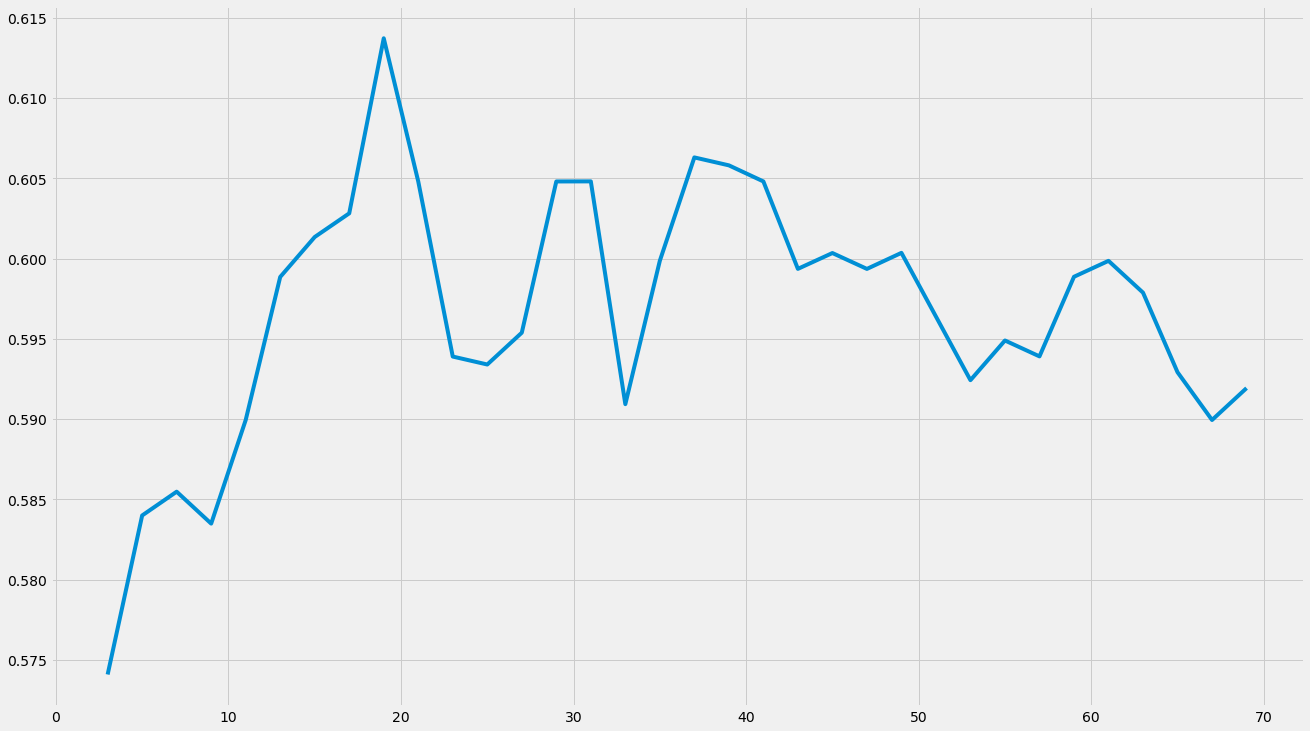

In [187]:
neighbors = range(3,71,2)

cv_scores = []

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    cv_score = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
    cv_scores.append(cv_score)
    
plt.figure(figsize=(20,12))
plt.plot(neighbors, cv_scores, linewidth=4)

In [190]:
ss = StandardScaler()
mm = MinMaxScaler()

In [191]:
X_ss = ss.fit_transform(X)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_ss,y)
model.score(X_ss, y)

0.7803668815071889

In [188]:

from sklearn.tree import DecisionTreeClassifier

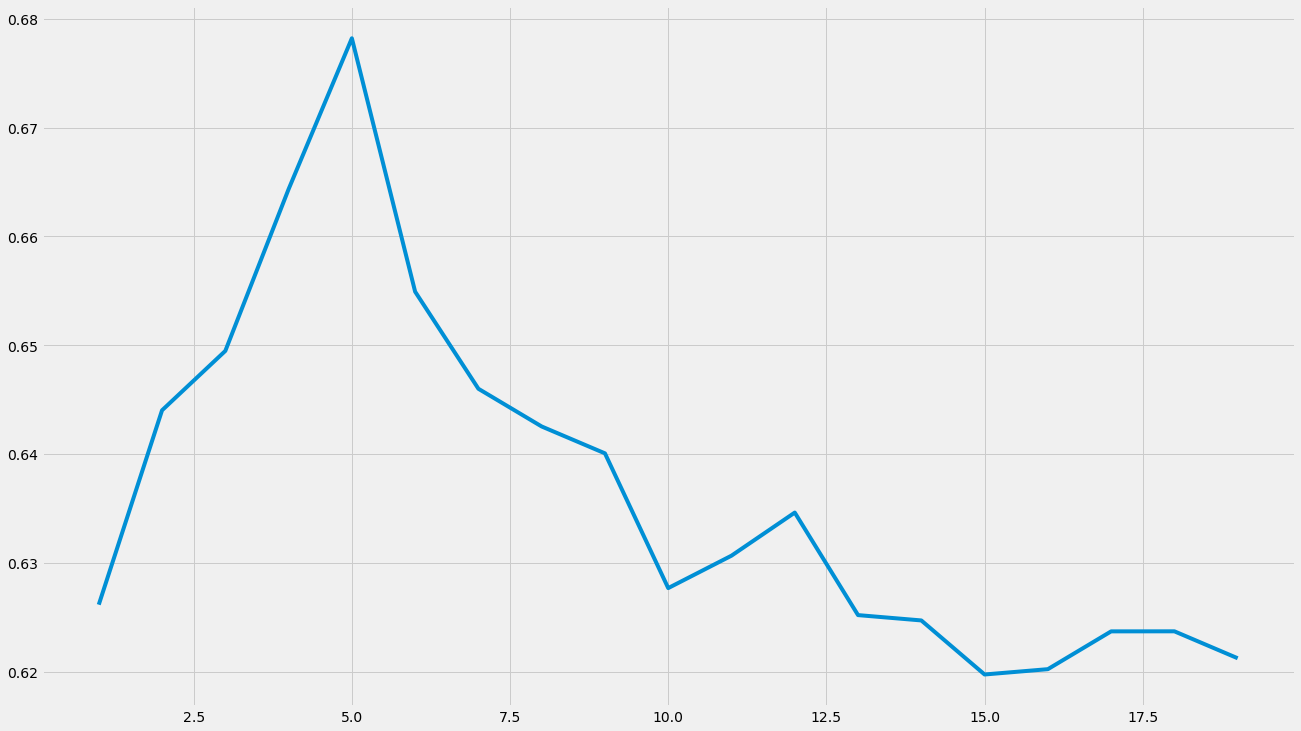

In [189]:
depths = range(1,20)

cv_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    cv_score = cross_val_score(model, X, y, scoring="accuracy", cv=5).mean()
    cv_scores.append(cv_score)
    
plt.figure(figsize=(20,12))
plt.plot(depths, cv_scores, linewidth=4)

In [178]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
from sklearn.tree import export_graphviz
import graphviz

#Export the decision tree graph viz object. We have to export and the re-import it
export_graphviz(dt, out_file='spotoify.dot', 
                    feature_names=X.columns, 
                    class_names=["like","dislike"])
with open("spotify.dot") as f: 
        dot_graph = f.read()
graphviz.Source(dot_graph)

FileNotFoundError: [Errno 2] No such file or directory: 'spotify.dot'

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.25, random_state=56)
